<a href="https://colab.research.google.com/github/MarcosRoms/Deep_learning_colab/blob/main/Ejemplo_5_Mostrar_el_efecto_de_Data_augmentation_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de lo que hace la aumentación de datos

Epoch 1/20


c:\Users\canek\miniconda3\envs\Diplomado\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


468/468 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.5068 - loss: 1.4466 - val_accuracy: 0.7391 - val_loss: 0.7827
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.7502 - loss: 0.7610 - val_accuracy: 0.7836 - val_loss: 0.6578
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.7932 - loss: 0.6372 - val_accuracy: 0.8099 - val_loss: 0.5601
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.8227 - loss: 0.5517 - val_accuracy: 0.8332 - val_loss: 0.5018
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.8373 - loss: 0.5022 - val_accuracy: 0.8486 - val_loss: 0.4658
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.8548 - loss: 0.4492 - val_accuracy: 0.8598 - val_loss: 0.4287
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.8603 - loss: 0.4352 - val_accuracy: 0.8671 - val_loss: 0.4137
Epoch 8/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8703 - loss: 0.4061 - val_accurac

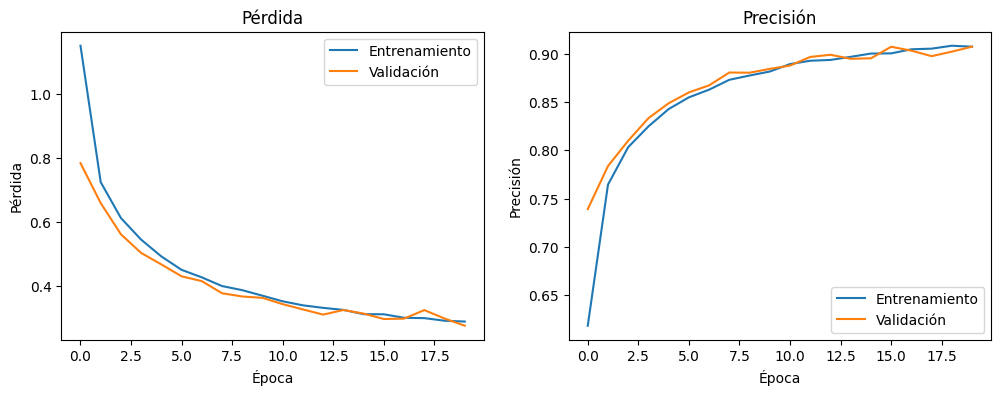

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset de MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Redimensionar las imágenes para incluir el canal de color
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convertir las etiquetas a formato one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Definir la arquitectura del modelo CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Primera capa convolucional con 32 filtros de tamaño 3x3 y activación ReLU
    MaxPooling2D(pool_size=(2, 2)),  # Primera capa de pooling con tamaño de ventana 2x2
    Flatten(),  # Aplanar las salidas para conectarlas a la capa densa
    Dense(128, activation='relu'),  # Capa densa con 128 neuronas y activación ReLU
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por cada clase) y activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Usar el optimizador Adam, la pérdida de entropía cruzada categórica y la métrica de precisión

# Definir las transformaciones de Albumentations
transform = A.Compose([
    A.RandomRotate90(),  # Rotar aleatoriamente la imagen 90 grados
    A.Flip(),  # Voltear aleatoriamente la imagen horizontal y verticalmente
    A.Transpose(),  # Transponer aleatoriamente la imagen
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15),  # Aplicar desplazamiento, escalado y rotación aleatorios
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2)  # Aplicar cambios aleatorios de brillo y contraste
])

# Aplicar las transformaciones de Albumentations
def augment_images(images, labels):
    images_augmented = np.empty_like(images)  # Crear un array vacío para almacenar las imágenes aumentadas
    for i in range(images.shape[0]):  # Iterar sobre cada imagen
        augmented = transform(image=images[i])  # Aplicar las transformaciones
        images_augmented[i] = augmented['image']  # Almacenar la imagen aumentada
    return images_augmented, labels  # Devolver las imágenes y etiquetas aumentadas

# Crear un generador de datos con la función de ampliación
def data_generator(images, labels, batch_size):
    while True:  # Bucle infinito para el generador
        indices = np.arange(len(images))  # Crear una lista de índices de las imágenes
        np.random.shuffle(indices)  # Barajar los índices
        for start in range(0, len(images), batch_size):  # Iterar sobre los índices en pasos del tamaño del batch
            end = min(start + batch_size, len(images))  # Definir el final del batch actual
            batch_indices = indices[start:end]  # Obtener los índices del batch actual
            batch_images = images[batch_indices]  # Obtener las imágenes del batch actual
            batch_labels = labels[batch_indices]  # Obtener las etiquetas del batch actual
            batch_images, batch_labels = augment_images(batch_images, batch_labels)  # Aplicar la ampliación de datos
            yield batch_images, batch_labels  # Devolver las imágenes y etiquetas aumentadas del batch

# Definir los generadores de datos
train_generator = data_generator(train_images, train_labels, batch_size=128)  # Crear el generador de datos de entrenamiento
validation_generator = data_generator(test_images, test_labels, batch_size=128)  # Crear el generador de datos de validación

# Entrenar el modelo utilizando el generador de datos
history = model.fit(train_generator, epochs=20, steps_per_epoch=len(train_images) // 128,
                    validation_data=validation_generator, validation_steps=len(test_images) // 128)  # Entrenar el modelo durante 20 épocas

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)  # Evaluar el modelo en el conjunto de prueba
print(f"Test accuracy: {test_acc}")  # Imprimir la precisión del modelo en el conjunto de prueba

# Graficar la pérdida y la precisión del entrenamiento y la validación
plt.figure(figsize=(12, 4))  # Crear una figura de tamaño 12x4
plt.subplot(1, 2, 1)  # Crear el primer subplot
plt.plot(history.history['loss'], label='Entrenamiento')  # Graficar la pérdida de entrenamiento
plt.plot(history.history['val_loss'], label='Validación')  # Graficar la pérdida de validación
plt.title('Pérdida')  # Título del gráfico
plt.xlabel('Época')  # Etiqueta del eje x
plt.ylabel('Pérdida')  # Etiqueta del eje y
plt.legend()  # Mostrar la leyenda

plt.subplot(1, 2, 2)  # Crear el segundo subplot
plt.plot(history.history['accuracy'], label='Entrenamiento')  # Graficar la precisión de entrenamiento
plt.plot(history.history['val_accuracy'], label='Validación')  # Graficar la precisión de validación
plt.title('Precisión')  # Título del gráfico
plt.xlabel('Época')  # Etiqueta del eje x
plt.ylabel('Precisión')  # Etiqueta del eje y
plt.legend()  # Mostrar la leyenda

plt.show()  # Mostrar los gráficos
